In [1]:
import pyLIMA

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import csv

from pyLIMA.fits import DE_fit
from pyLIMA.fits import TRF_fit
from pyLIMA.models import PSPL_model
from pyLIMA.models import USBL_model, pyLIMA_fancy_parameters
from pyLIMA.outputs import pyLIMA_plots

from pyLIMA import event
from pyLIMA import telescopes

In [3]:
your_event = event.Event(ra=262.75616,dec=-21.40123)
your_event.name = 'Gaia21bsg'

In [4]:
data_1 = np.loadtxt('data/star_20957_Gaia21bsg_fs01_ip_reduced.dat')
telescope_1 = telescopes.Telescope(name='Gaia_20957_i',
                                  camera_filter = 'I',
                                  light_curve = data_1.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_2 = np.loadtxt('data/star_50085_Gaia21bsg_gp_reduced.dat')
telescope_2 = telescopes.Telescope(name='Gaia__50085_g',
                                  camera_filter = 'G',
                                  light_curve = data_2.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_3 = np.loadtxt('data/star_79874_Gaia21bsg_ip_reduced.dat')
telescope_3 = telescopes.Telescope(name='Gaia_79874_i',
                                  camera_filter = 'I',
                                  light_curve = data_3.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [5]:
#plt.plot(data_3[:,0],data_3[:,1])

In [6]:
data_4 = np.loadtxt('data/reduced_atlas_c.dat',delimiter=' ')   # will need to use func to convert to HDJD
#data_4[:,0] = data_4[:,0] + 2.4e6
telescope_4 = telescopes.Telescope(name='ATLAS_c',
                                  camera_filter = 'C',
                                  light_curve = data_4.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [7]:
#plt.plot(data_4[:,0],data_4[:,1],'o')

In [8]:
data_5 = np.loadtxt('data/reduced_atlas_o.dat',delimiter=' ')   # will need to use func to convert to HJD
#data_5[:,0] = data_5[:,0] + 2.4e6
telescope_5 = telescopes.Telescope(name='ATLAS_o',
                                  camera_filter = 'O',
                                  light_curve = data_5.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [9]:
#plt.plot(data_4[:,0],data_4[:,1])

In [10]:
data_6 = np.loadtxt('data/reduced_ztf.dat',delimiter=' ')   # will need to use func to convert HJD
#data_6[:,0] = data_6[:,0] + 2.4e6
telescope_6 = telescopes.Telescope(name='ZTF_r',
                                  camera_filter = 'R',
                                  light_curve = data_6.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [11]:
#plt.plot(data_5[:,0],data_5[:,1])

In [12]:
data_7 = np.loadtxt('data/reduced_gaia.dat',delimiter=' ')    # will need to use func to convert HJD
#data_7[:,0] = data_7[:,0] + 2.4e6
telescope_7 = telescopes.Telescope(name='Gaia_g',
                                  camera_filter = 'G',
                                  light_curve = data_7.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD', 'mag','mag'])

# object id found via ztf: 281216400001763

In [13]:
your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)
your_event.telescopes.append(telescope_3)
your_event.telescopes.append(telescope_4)
your_event.telescopes.append(telescope_5)
your_event.telescopes.append(telescope_6)
your_event.telescopes.append(telescope_7)

In [14]:
your_event.find_survey('Gaia')

In [15]:
your_event.check_event()

check_event  : Everything looks fine...


In [16]:
from pyLIMA.models import PSPL_model
pspl = PSPL_model.PSPLmodel(your_event)

In [17]:
from pyLIMA.fits import DE_fit

In [18]:
my_fit = DE_fit.DEfit(pspl)

In [19]:
my_fit.fit_parameters

OrderedDict([('t0', [0, (2457269.2454256364, 2460112.73446061)]),
             ('u0', [1, (0.0, 1.0)]),
             ('tE', [2, (0.1, 500)])])

In [20]:
my_fit.fit()

DE converge to objective function : f(x) =  70638.93147466515
DE converge to parameters : =  ['2459353.871067361' '0.9999736732551108' '1.1260932640684018']
fit  : Differential Evolution fit SUCCESS
best_model: [2.45935387e+06 9.99973673e-01 1.12609326e+00] -ln(likelihood) 70638.93147466515


In [21]:
my_fit.fit_results

{'best_model': array([2.45935387e+06, 9.99973673e-01, 1.12609326e+00]),
 '-(ln_likelihood)': 70638.93147466515,
 'fit_time': 8.888312339782715,
 'DE_population': array([[ 2.45862347e+06,  9.72118508e-03,  3.55656333e+02, ...,
         -5.79004748e+01,  1.59828726e+03,  1.53740009e+05],
        [ 2.45859508e+06,  6.43140936e-01,  1.67779230e+02, ...,
         -3.40602032e+02,  1.87904753e+03,  1.53995714e+05],
        [ 2.45929568e+06,  4.92988182e-01,  4.19315628e+02, ...,
          1.24700435e+03, -9.50399518e-01,  1.48792315e+05],
        ...,
        [ 2.45935388e+06,  9.99153309e-01,  1.11315837e+00, ...,
          8.46970209e+09, -8.46970067e+09,  7.06421002e+04],
        [ 2.45935388e+06,  9.98362501e-01,  1.12842921e+00, ...,
          8.02029382e+09, -8.02029241e+09,  7.06406759e+04],
        [ 2.45935388e+06,  7.61156356e-01,  1.11071299e+00, ...,
          8.54137658e+09, -8.54137517e+09,  7.16640486e+04]])}

In [22]:
my_fit.fit_results['best_model']

array([2.45935387e+06, 9.99973673e-01, 1.12609326e+00])

In [23]:
my_fit.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE'])

<IPython.core.display.Javascript object>


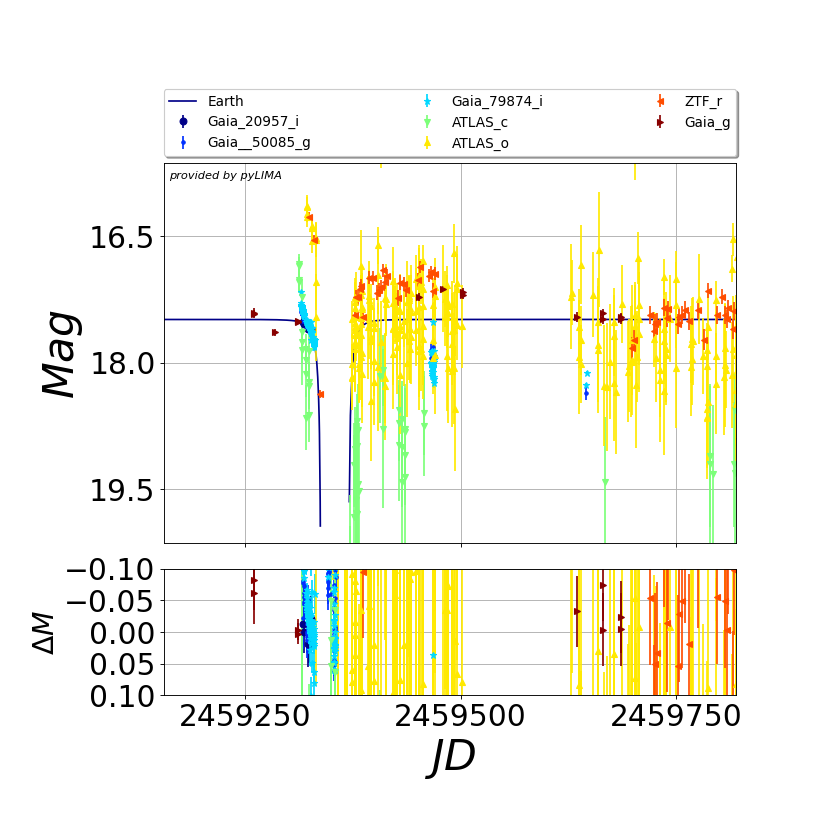

/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1017: RuntimeWarning: invalid value encountered in log10
  np.log10(ref_source * magni + ref_blend)
/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1112: RuntimeWarning: invalid value encountered in log10
  np.log10(model_flux)


In [24]:
from pyLIMA.outputs import pyLIMA_plots
pyLIMA_plots.plot_lightcurves(pspl,my_fit.fit_results['best_model'])
plt.show()

In [ ]:
from pyLIMA.fits import LM_fit

In [ ]:
my_fit2 = LM_fit.LMfit(pspl)

In [ ]:
my_fit2.fit()

In [ ]:
my_fit2.fit_results

In [ ]:
my_fit2.fit_results['best_model']

In [ ]:
my_fit2.fit_parameters.keys()

In [ ]:
pyLIMA_plots.plot_lightcurves(pspl,my_fit2.fit_results['best_model'])
plt.savefig('output1.png')
plt.show()